In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and peek the data:


In [2]:
filepath='Data/bank_loan_dataset.csv'
df=pd.read_csv(filepath)

In [3]:
print("Shape:")
df.shape


Shape:


(8, 13)

In [4]:
print('first five lines :')

first five lines :


In [5]:
print('Columns:')
df.columns.to_list()

Columns:


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [6]:
print('basic info :')
df.info()


basic info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            8 non-null      object 
 1   Gender             7 non-null      object 
 2   Married            7 non-null      object 
 3   Dependents         8 non-null      object 
 4   Education          8 non-null      object 
 5   Self_Employed      8 non-null      object 
 6   ApplicantIncome    8 non-null      int64  
 7   CoapplicantIncome  8 non-null      int64  
 8   LoanAmount         7 non-null      float64
 9   Loan_Amount_Term   7 non-null      float64
 10  Credit_History     6 non-null      float64
 11  Property_Area      8 non-null      object 
 12  Loan_Status        8 non-null      object 
dtypes: float64(3), int64(2), object(8)
memory usage: 964.0+ bytes


In [7]:
# missing values:
df.isnull().sum()

Loan_ID              0
Gender               1
Married              1
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     1
Credit_History       2
Property_Area        0
Loan_Status          0
dtype: int64

there are null values in the 5 columns 

In [8]:
# dealing with the null values:
df['Gender']=df['Gender'].fillna('unknown')
mode_value=df['Married'].mode()[0]
df['Married']=df['Married'].fillna(mode_value)
df['LoanAmount']=df.groupby(['Education','Self_Employed'])['LoanAmount'].transform(lambda x:x.fillna(x.median()))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# duplicate values:
df.duplicated().sum()

np.int64(0)

No Duplicated Values are present in this 

In [10]:
# describing the datasest in the terms :
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,8.0,4100.125000,1530.753917,2333.0,2895.750000,3809.5,5525.00,6000.0
CoapplicantIncome,8.0,1510.250000,1500.574914,0.0,0.000000,1512.0,2394.50,4196.0
LoanAmount,8.0,137.875000,59.289694,66.0,113.750000,128.0,145.25,267.0
Loan_Amount_Term,8.0,360.000000,0.000000,360.0,360.000000,360.0,360.00,360.0
Credit_History,8.0,0.833333,0.345033,0.0,0.833333,1.0,1.00,1.0


# Deep Porofiling of Dataset

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Yes,0,Graduate,No,5849,0,128.0,360.0,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.000000,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.000000,Rural,N
3,LP001006,Female,No,0,Graduate,No,2583,2358,120.0,360.0,0.833333,Semiurban,Y
4,LP001008,Male,Yes,1,Graduate,No,6000,0,141.0,360.0,1.000000,urban,Y


In [12]:
# identify the unique values of the dataset:

for col in df.columns:
    unique_vals=df[col].unique()
    print(f"{col} : {unique_vals}  ")

Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014']  
Gender : ['Male' 'Female' 'unknown']  
Married : ['Yes' 'No']  
Dependents : ['0' '1' '2' '3+']  
Education : ['Graduate' 'Not Graduate']  
Self_Employed : ['No' 'Yes']  
ApplicantIncome : [5849 4583 3000 2583 6000 5417 2333 3036]  
CoapplicantIncome : [   0 1508 2358 4196 1516 2504]  
LoanAmount : [128.  66. 120. 141. 267.  95. 158.]  
Loan_Amount_Term : [360.]  
Credit_History : [1.         0.83333333 0.        ]  
Property_Area : ['Urban' 'Rural' 'Semiurban' 'urban' 'SemiUrban']  
Loan_Status : ['Y' 'N']  


In [13]:
#  Check data types & distributions
# Purpose: Detect wrong types (e.g., numbers stored as strings, dates as objects)

In [14]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
# there is no date variable if its there we have to convert it to the datetime fuctions
# convert categorical variavles dtype into category:

categorical_vars=df.select_dtypes(include=['object'])
for cols in categorical_vars:
    df[cols]=df[cols].astype('category')

df.dtypes

Loan_ID              category
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object

In [16]:
# Detect string inconsistencies
cate_cols=df.select_dtypes(include='category').columns
for col in cate_cols:
    df[col]=df[col].str.strip().str.title()

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Lp001002,Male,Yes,0,Graduate,No,5849,0,128.0,360.0,1.000000,Urban,Y
1,Lp001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.000000,Urban,Y
2,Lp001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.000000,Rural,N
3,Lp001006,Female,No,0,Graduate,No,2583,2358,120.0,360.0,0.833333,Semiurban,Y
4,Lp001008,Male,Yes,1,Graduate,No,6000,0,141.0,360.0,1.000000,Urban,Y


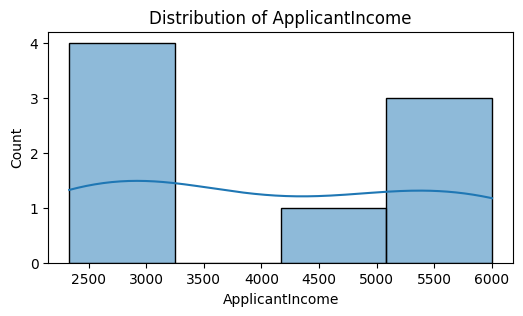

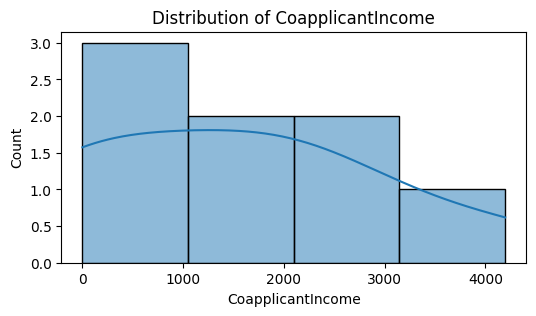

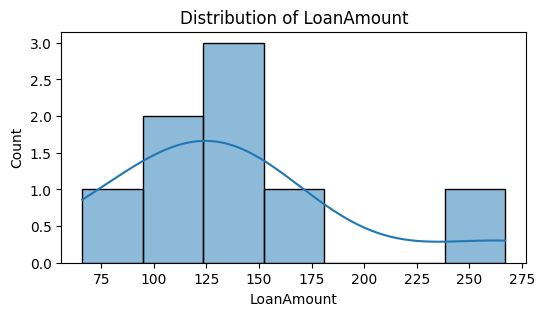

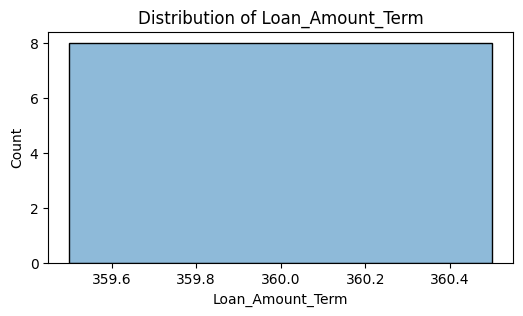

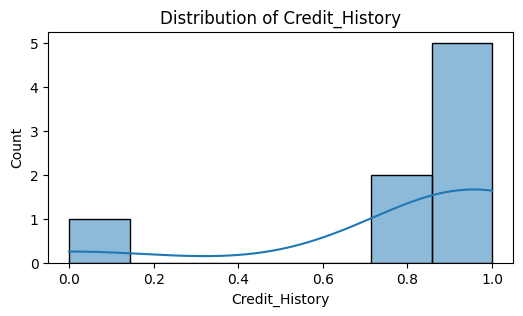

In [18]:
# Check numeric feature distributions
# Purpose: Identify skewness, scaling needs, and outliers

num_cols=df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# ***Encoding Categorical Variables***

In [19]:
df.select_dtypes(include='object').columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

this are all the categorical variables we have to convert all of them into numerical values for the ml models by using diff methods

# 1.One-Hot Encoding (Nominal Features)

Nominal features have no inherent order (e.g., Property_Area = Urban, Rural, Semiurban).

Machine learning models cannot directly understand text.

One-Hot Encoding (OHE) converts each unique category into its own binary column (0 or 1).

In [20]:
# OHE for property_area:
encoded_df=pd.get_dummies(df,columns=['Property_Area'],drop_first=True)

In [21]:
# OHE on gender:
encoded_df=pd.get_dummies(df,columns=['Gender'],prefix='Gender',dummy_na=False,drop_first=True)

# 2.Label Encoding (Ordinal Features)


Ordinal features have a natural order.

Example: Education = Not Graduate < Graduate

In these cases, we replace categories with ordered integers.

In [22]:
# we use mapping for this :

edu_map={'Not Graduate':0,'Graduate':1}
encoded_df['Education_Encoded']=df['Education'].map(edu_map)

encoded_df[['Education','Education_Encoded']]

,Education,Education_Encoded
0,Graduate,1
1,Graduate,1
2,Graduate,1
3,Graduate,1
4,Graduate,1
5,Graduate,1
6,Graduate,1
7,Not Graduate,0


# 3.Frequency Encoding (High-Cardinality Features)

Some categorical features have too many unique categories (high cardinality).

Example: City names, Zip codes, Product IDs.

One-Hot Encoding for 500+ categories → hundreds of columns → huge, slow model.

Frequency Encoding replaces each category with how often it appears in the dataset.

In [23]:
# we have to generate the map for the implementing the freq encoding :
freq_map=encoded_df['Property_Area'].value_counts().to_dict()
encoded_df['Property_Area_freq']=encoded_df['Property_Area'].map(freq_map)
encoded_df[['Property_Area','Property_Area_freq']].head()

,Property_Area,Property_Area_freq
0,Urban,3
1,Urban,3
2,Rural,3
3,Semiurban,2
4,Urban,3


# For Binary Varibles:


***we have to convert the binary values like yes /no or any two valued column into numerical column***

In [24]:
# Load_status are binary:

encoded_df['Loan_Status']=encoded_df['Loan_Status'].map({'Y':1,'N':0})
encoded_df['Married']=encoded_df['Married'].map({'Yes':1,'No':0})
encoded_df['Self_Employed']=encoded_df['Self_Employed'].map({'Yes':1,'No':0})

In [25]:
encoded_df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Gender_Unknown,Education_Encoded,Property_Area_freq
0,Lp001002,1,0,Graduate,0,5849,0,128.0,360.0,1.000000,Urban,1,True,False,1,3
1,Lp001003,1,1,Graduate,0,4583,1508,128.0,360.0,1.000000,Urban,1,True,False,1,3
2,Lp001005,1,0,Graduate,1,3000,0,66.0,360.0,1.000000,Rural,0,True,False,1,3
3,Lp001006,0,0,Graduate,0,2583,2358,120.0,360.0,0.833333,Semiurban,1,False,False,1,2
4,Lp001008,1,1,Graduate,0,6000,0,141.0,360.0,1.000000,Urban,1,True,False,1,3
5,Lp001011,1,2,Graduate,0,5417,4196,267.0,360.0,1.000000,Semiurban,1,False,True,1,2
6,Lp001013,1,0,Graduate,0,2333,1516,95.0,360.0,0.833333,Rural,0,True,False,1,3
7,Lp001014,1,3+,Not Graduate,1,3036,2504,158.0,360.0,0.000000,Rural,0,True,False,0,3


# 4.Target Encoding

Target Encoding replaces each category in a feature with the mean of the target variable for that category.

This is super useful when:

You have high-cardinality categorical features.

There’s a clear relationship between category and target.

❌ If you calculate target means using the entire dataset before splitting train/test,
your model will “see” information from the test set during training → overfitting.

Always calculate target means only on the training set.

Apply them to the test set separately.



In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_df,test_df=train_test_split(encoded_df,test_size=0.2,random_state=42)

# target_means=train_df.groupby('Property_Area')['Loan_Status'].mean()
target_means =train_df.groupby('Property_Area')['Loan_Status'].mean()

train_df['Property_Area_TE']=train_df['Property_Area'].map(target_means)
test_df['Property_Area_TE']=test_df['Property_Area'].map(target_means)

train_df[['Property_Area','Property_Area_TE']].head()

,Property_Area,Property_Area_TE
0,Urban,1.0
7,Rural,0.0
2,Rural,0.0
4,Urban,1.0
3,Semiurban,1.0


In [28]:
train_df,test_df=train_test_split(encoded_df,test_size=0.2,random_state=42)

target_means=train_df.groupby('Married')['Loan_Status'].mean()
train_df['Married_TE']=train_df['Married'].map(target_means)
test_df['Married_TE']=test_df['Married'].map(target_means)

train_df[['Married','Married_TE']]

,Married,Married_TE
0,1,0.4
7,1,0.4
2,1,0.4
4,1,0.4
3,0,1.0
6,1,0.4


# Scaling & Normalization

#### scaling is important to give model standard information other wise models wighs the featuer according to their magnitude

ApplicantIncome ranges: 2000–50000

LoanAmount ranges: 50–700

Credit_History ranges: 0–1
👉 Without scaling, models like Logistic Regression will weigh ApplicantIncome much higher by magnitude alone.

#  Standardization  (Z-score scaling)

In [29]:
# we have to apply the scaling and normalizing methods on the numerical type variables:
df.select_dtypes(include=['int64','float64']).columns.tolist()
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

so we have to apply the scaling and normalization on the above variables

In [30]:
encoded_df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Gender_Unknown,Education_Encoded,Property_Area_freq
0,Lp001002,1,0,Graduate,0,5849,0,128.0,360.0,1.000000,Urban,1,True,False,1,3
1,Lp001003,1,1,Graduate,0,4583,1508,128.0,360.0,1.000000,Urban,1,True,False,1,3
2,Lp001005,1,0,Graduate,1,3000,0,66.0,360.0,1.000000,Rural,0,True,False,1,3
3,Lp001006,0,0,Graduate,0,2583,2358,120.0,360.0,0.833333,Semiurban,1,False,False,1,2
4,Lp001008,1,1,Graduate,0,6000,0,141.0,360.0,1.000000,Urban,1,True,False,1,3
5,Lp001011,1,2,Graduate,0,5417,4196,267.0,360.0,1.000000,Semiurban,1,False,True,1,2
6,Lp001013,1,0,Graduate,0,2333,1516,95.0,360.0,0.833333,Rural,0,True,False,1,3
7,Lp001014,1,3+,Not Graduate,1,3036,2504,158.0,360.0,0.000000,Rural,0,True,False,0,3


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
encoded_df[['ApplicantIncome_scaled','LoanAmount_scaled']]=scaler.fit_transform(encoded_df[['ApplicantIncome','LoanAmount']])
encoded_df[['ApplicantIncome_scaled','LoanAmount_scaled']].head()

,ApplicantIncome_scaled,LoanAmount_scaled
0,1.221376,-0.178055
1,0.337229,-0.178055
2,-0.768303,-1.295969
3,-1.059527,-0.322302
4,1.326831,0.056346


we did in the above cell is:
z= x−μ/σ
 
where:
x = original value
μ = mean of the column
σ = standard deviation of the column

this formula in code so that the values we get is btw 1 and -1 with mean=0

Use when:

Data is roughly normally distributed (bell-shaped)

Models are distance-based or linear models

Don’t use for:

Tree-based models (they don’t need scaling)


# Min-Max Scaling (Normalization)

Min-Max Scaling rescales values so that the minimum becomes 0 and the maximum becomes 1 (or any range you set).

Formula:
          X'=X-Xmin/Xmax-Xmin




This transforms every value relative to the min and max of that column.

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler=MinMaxScaler()
encoded_df[["ApplicantIncome_norm","LoanAmount_norm"]]=scaler.fit_transform(encoded_df[["ApplicantIncome","LoanAmount"]])
encoded_df[['ApplicantIncome_norm','LoanAmount_norm']].head()

,ApplicantIncome_norm,LoanAmount_norm
0,0.958822,0.308458
1,0.613581,0.308458
2,0.181893,0.000000
3,0.068176,0.268657
4,1.000000,0.373134


# Robust Scaling 

In [35]:
from sklearn.preprocessing import RobustScaler

X′= X−Median\IQR

In [36]:
scaler=RobustScaler()
encoded_df[['CoapplicantIncome_norm']]=scaler.fit_transform(encoded_df[['CoapplicantIncome']])
encoded_df[['CoapplicantIncome_norm']]


,CoapplicantIncome_norm
0,-0.631447
1,-0.001670
2,-0.631447
3,0.353310
4,-0.631447
5,1.120902
6,0.001670
7,0.414283


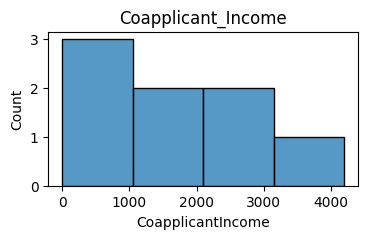

In [37]:
plt.figure(figsize=(4,2))
sns.histplot(data=encoded_df['CoapplicantIncome'])
plt.title('Coapplicant_Income')
plt.show()

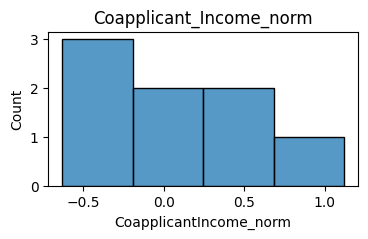

In [38]:
plt.figure(figsize=(4,2))
sns.histplot(data=encoded_df['CoapplicantIncome_norm'],bins=4)
plt.title('Coapplicant_Income_norm')
plt.show()

We can compare the values by histogram after each scaling and normalization

# MaxAbsScaler

In [39]:
from sklearn.preprocessing import MaxAbsScaler

In [40]:
scaler=MaxAbsScaler()
encoded_df[['ApplicantIncome_scaled']]=scaler.fit_transform(encoded_df[['ApplicantIncome']])
encoded_df[['ApplicantIncome_scaled']]

,ApplicantIncome_scaled
0,0.974833
1,0.763833
2,0.500000
3,0.430500
4,1.000000
5,0.902833
6,0.388833
7,0.506000


In [41]:
encoded_df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_Status,Gender_Male,Gender_Unknown,Education_Encoded,Property_Area_freq,ApplicantIncome_scaled,LoanAmount_scaled,ApplicantIncome_norm,LoanAmount_norm,CoapplicantIncome_norm
0,Lp001002,1,0,Graduate,0,5849,0,128.0,360.0,1.000000,...,1,True,False,1,3,0.974833,-0.178055,0.958822,0.308458,-0.631447
1,Lp001003,1,1,Graduate,0,4583,1508,128.0,360.0,1.000000,...,1,True,False,1,3,0.763833,-0.178055,0.613581,0.308458,-0.001670
2,Lp001005,1,0,Graduate,1,3000,0,66.0,360.0,1.000000,...,0,True,False,1,3,0.500000,-1.295969,0.181893,0.000000,-0.631447
3,Lp001006,0,0,Graduate,0,2583,2358,120.0,360.0,0.833333,...,1,False,False,1,2,0.430500,-0.322302,0.068176,0.268657,0.353310
4,Lp001008,1,1,Graduate,0,6000,0,141.0,360.0,1.000000,...,1,True,False,1,3,1.000000,0.056346,1.000000,0.373134,-0.631447


# Feature Transformation And Skewness Handling :

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Lp001002,Male,Yes,0,Graduate,No,5849,0,128.0,360.0,1.000000,Urban,Y
1,Lp001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.000000,Urban,Y
2,Lp001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.000000,Rural,N
3,Lp001006,Female,No,0,Graduate,No,2583,2358,120.0,360.0,0.833333,Semiurban,Y
4,Lp001008,Male,Yes,1,Graduate,No,6000,0,141.0,360.0,1.000000,Urban,Y


In [43]:
#lets check the numerical ones:
df.select_dtypes(include=['int64','float64'])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0,128.0,360.0,1.000000
1,4583,1508,128.0,360.0,1.000000
2,3000,0,66.0,360.0,1.000000
3,2583,2358,120.0,360.0,0.833333
4,6000,0,141.0,360.0,1.000000
5,5417,4196,267.0,360.0,1.000000
6,2333,1516,95.0,360.0,0.833333
7,3036,2504,158.0,360.0,0.000000


Skewness :: 0.16230352746635587


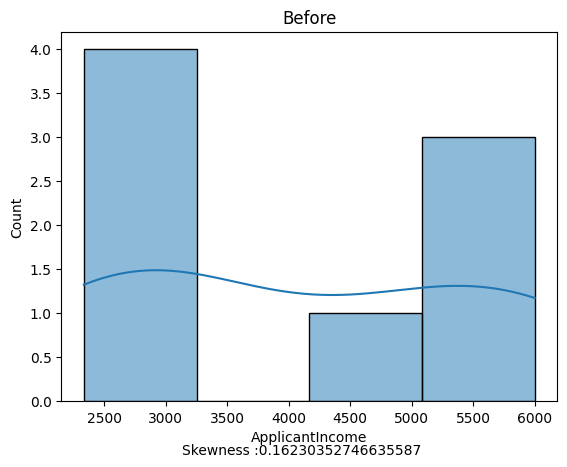

In [44]:
skew_df=df
# we have to plot the histplot for comparing the transformation so lets make function for it:
def histplot(col,title):
    sns.histplot(df[col],kde=True)
    plt.title(title)
    plt.figtext(0.5,0,f'Skewness :{skew_df[col].skew()}', horizontalalignment='center') #
    plt.show()
    

#lets checks skewness of applicantincome column :
print('Skewness ::',skew_df['ApplicantIncome'].skew())
histplot('ApplicantIncome','Before')

In [45]:
#lets take the appliacntincome column 

# so it has many large values we have to use log or sqrt or we can also use boxcox method 

skew_df['ApplicantIncome_log']=np.log1p(df['ApplicantIncome'])
skew_df[['ApplicantIncome','ApplicantIncome_log']]

,ApplicantIncome,ApplicantIncome_log
0,5849,8.674197
1,4583,8.430327
2,3000,8.006701
3,2583,7.857094
4,6000,8.699681
5,5417,8.597482
6,2333,7.755339
7,3036,8.018625


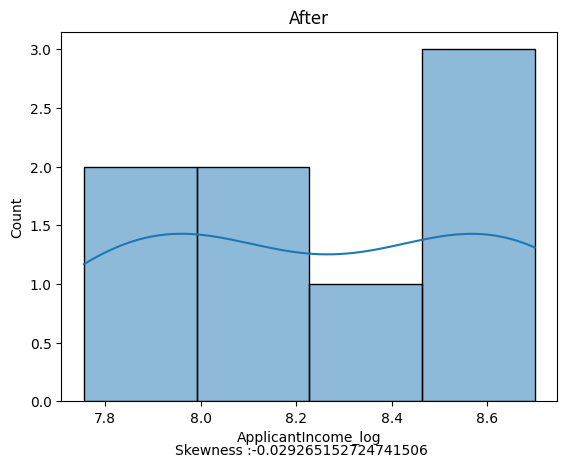

In [46]:
histplot('ApplicantIncome_log','After')

Skewness  : 0.5992197868398244


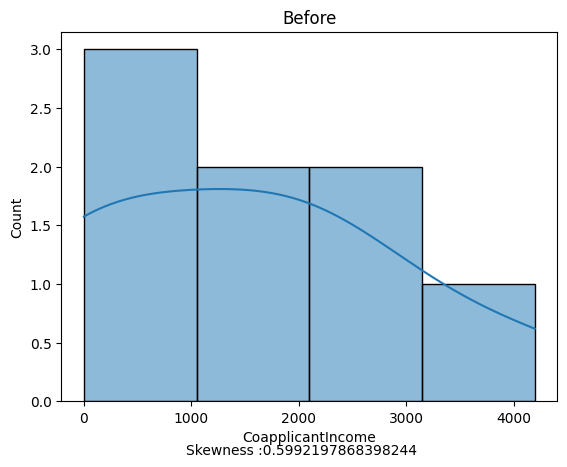

In [47]:
#now lets skewness of the coapplicanincome column:
print(f'Skewness  : {skew_df['CoapplicantIncome'].skew()}')
histplot('CoapplicantIncome','Before')

so this is little right or positive skewed so we have to use log transorm :

In [48]:
skew_df['CoapplicantIncome_log']=np.log1p(skew_df['CoapplicantIncome'])

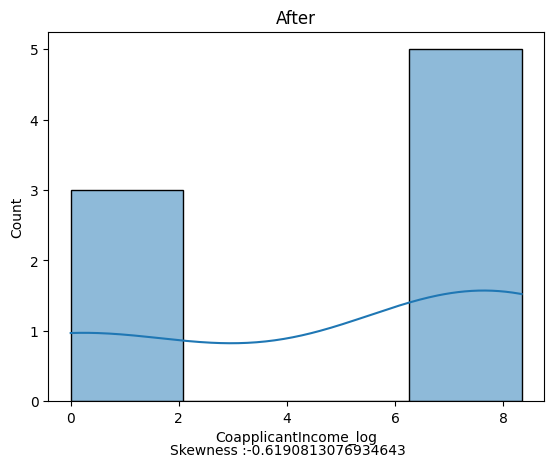

In [49]:
histplot('CoapplicantIncome_log','After')


In [50]:
#now apply the BoxCox on the loan amount
from scipy.stats import boxcox

transformed_data,best_lambda=boxcox(skew_df['LoanAmount'])

print(f"optimal lambda: {best_lambda}")


optimal lambda: -0.1692589846081161


# Interaction & Polynomial Features

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
encoded_df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_Status,Gender_Male,Gender_Unknown,Education_Encoded,Property_Area_freq,ApplicantIncome_scaled,LoanAmount_scaled,ApplicantIncome_norm,LoanAmount_norm,CoapplicantIncome_norm
0,Lp001002,1,0,Graduate,0,5849,0,128.0,360.0,1.000000,...,1,True,False,1,3,0.974833,-0.178055,0.958822,0.308458,-0.631447
1,Lp001003,1,1,Graduate,0,4583,1508,128.0,360.0,1.000000,...,1,True,False,1,3,0.763833,-0.178055,0.613581,0.308458,-0.001670
2,Lp001005,1,0,Graduate,1,3000,0,66.0,360.0,1.000000,...,0,True,False,1,3,0.500000,-1.295969,0.181893,0.000000,-0.631447
3,Lp001006,0,0,Graduate,0,2583,2358,120.0,360.0,0.833333,...,1,False,False,1,2,0.430500,-0.322302,0.068176,0.268657,0.353310
4,Lp001008,1,1,Graduate,0,6000,0,141.0,360.0,1.000000,...,1,True,False,1,3,1.000000,0.056346,1.000000,0.373134,-0.631447
5,Lp001011,1,2,Graduate,0,5417,4196,267.0,360.0,1.000000,...,1,False,True,1,2,0.902833,2.328237,0.841014,1.000000,1.120902
6,Lp001013,1,0,Graduate,0,2333,1516,95.0,360.0,0.833333,...,0,True,False,1,3,0.388833,-0.773074,0.000000,0.144279,0.001670
7,Lp001014,1,3+,Not Graduate,1,3036,2504,158.0,360.0,0.000000,...,0,True,False,0,3,0.506000,0.362871,0.191710,0.457711,0.414283


In [52]:
df.drop(['ApplicantIncome_log','CoapplicantIncome_log'],axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Lp001002,Male,Yes,0,Graduate,No,5849,0,128.0,360.0,1.000000,Urban,Y
1,Lp001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.000000,Urban,Y
2,Lp001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.000000,Rural,N
3,Lp001006,Female,No,0,Graduate,No,2583,2358,120.0,360.0,0.833333,Semiurban,Y
4,Lp001008,Male,Yes,1,Graduate,No,6000,0,141.0,360.0,1.000000,Urban,Y
5,Lp001011,Unknown,Yes,2,Graduate,No,5417,4196,267.0,360.0,1.000000,Semiurban,Y
6,Lp001013,Male,Yes,0,Graduate,No,2333,1516,95.0,360.0,0.833333,Rural,N
7,Lp001014,Male,Yes,3+,Not Graduate,Yes,3036,2504,158.0,360.0,0.000000,Rural,N


In [57]:
num_features=['ApplicantIncome_scaled',
    'CoapplicantIncome_norm',
    'LoanAmount_scaled',
    'Credit_History',
    'Property_Area_freq']

x=encoded_df[num_features]

In [58]:
# create polynoial feature transformer 
poly=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly.fit_transform(x)

In [61]:
# for column names for new features
feature_names=poly.get_feature_names_out(num_features)
df_poly=pd.DataFrame(x_poly,columns=feature_names)
df_poly.head()

,ApplicantIncome_scaled,CoapplicantIncome_norm,LoanAmount_scaled,Credit_History,Property_Area_freq,ApplicantIncome_scaled^2,ApplicantIncome_scaled CoapplicantIncome_norm,ApplicantIncome_scaled LoanAmount_scaled,ApplicantIncome_scaled Credit_History,ApplicantIncome_scaled Property_Area_freq,CoapplicantIncome_norm^2,CoapplicantIncome_norm LoanAmount_scaled,CoapplicantIncome_norm Credit_History,CoapplicantIncome_norm Property_Area_freq,LoanAmount_scaled^2,LoanAmount_scaled Credit_History,LoanAmount_scaled Property_Area_freq,Credit_History^2,Credit_History Property_Area_freq,Property_Area_freq^2
0,0.974833,-0.631447,-0.178055,1.000000,3.0,0.950300,-0.615556,-0.173574,0.974833,2.9245,0.398725,0.112432,-0.631447,-1.894341,0.031704,-0.178055,-0.534165,1.000000,3.000000,9.0
1,0.763833,-0.001670,-0.178055,1.000000,3.0,0.583441,-0.001276,-0.136004,0.763833,2.2915,0.000003,0.000297,-0.001670,-0.005011,0.031704,-0.178055,-0.534165,1.000000,3.000000,9.0
2,0.500000,-0.631447,-1.295969,1.000000,3.0,0.250000,-0.315724,-0.647985,0.500000,1.5000,0.398725,0.818336,-0.631447,-1.894341,1.679536,-1.295969,-3.887907,1.000000,3.000000,9.0
3,0.430500,0.353310,-0.322302,0.833333,2.0,0.185330,0.152100,-0.138751,0.358750,0.8610,0.124828,-0.113872,0.294425,0.706619,0.103878,-0.268585,-0.644604,0.694444,1.666667,4.0
4,1.000000,-0.631447,0.056346,1.000000,3.0,1.000000,-0.631447,0.056346,1.000000,3.0000,0.398725,-0.035580,-0.631447,-1.894341,0.003175,0.056346,0.169039,1.000000,3.000000,9.0


In [62]:
df_poly=pd.concat([df.reset_index(drop=True),df_poly],axis=1)

In [64]:
df_poly

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,CoapplicantIncome_norm^2,CoapplicantIncome_norm LoanAmount_scaled,CoapplicantIncome_norm Credit_History,CoapplicantIncome_norm Property_Area_freq,LoanAmount_scaled^2,LoanAmount_scaled Credit_History,LoanAmount_scaled Property_Area_freq,Credit_History^2,Credit_History Property_Area_freq,Property_Area_freq^2
0,Lp001002,Male,Yes,0,Graduate,No,5849,0,128.0,360.0,...,0.398725,0.112432,-0.631447,-1.894341,0.031704,-0.178055,-0.534165,1.000000,3.000000,9.0
1,Lp001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,...,0.000003,0.000297,-0.001670,-0.005011,0.031704,-0.178055,-0.534165,1.000000,3.000000,9.0
2,Lp001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,...,0.398725,0.818336,-0.631447,-1.894341,1.679536,-1.295969,-3.887907,1.000000,3.000000,9.0
3,Lp001006,Female,No,0,Graduate,No,2583,2358,120.0,360.0,...,0.124828,-0.113872,0.294425,0.706619,0.103878,-0.268585,-0.644604,0.694444,1.666667,4.0
4,Lp001008,Male,Yes,1,Graduate,No,6000,0,141.0,360.0,...,0.398725,-0.035580,-0.631447,-1.894341,0.003175,0.056346,0.169039,1.000000,3.000000,9.0
5,Lp001011,Unknown,Yes,2,Graduate,No,5417,4196,267.0,360.0,...,1.256421,2.609725,1.120902,2.241804,5.420685,2.328237,4.656473,1.000000,2.000000,4.0
6,Lp001013,Male,Yes,0,Graduate,No,2333,1516,95.0,360.0,...,0.000003,-0.001291,0.001392,0.005011,0.597643,-0.644228,-2.319221,0.694444,2.500000,9.0
7,Lp001014,Male,Yes,3+,Not Graduate,Yes,3036,2504,158.0,360.0,...,0.171630,0.150331,0.000000,1.242848,0.131676,0.000000,1.088614,0.000000,0.000000,9.0
